In [403]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [404]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
# Load the dataset
data = pd.read_csv('philly_housing.csv', low_memory=False)

In [406]:
# Display the first few rows of the DataFrame to verify it's loaded correctly
print("Initial Data:")
data.head()

Initial Data:


,objectid,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,...,utility,view_type,year_built,year_built_estimate,zip_code,zoning,pin,building_code_new,building_code_description_new,shape
0,433143301,2022-05-24 12:13:13-04:00,NaN,120' NW EADOM ST,987458,RB,NON PD PKG LOT COMMERCIAL,6,VACANT LAND,381.0,...,NaN,I,NaN,NaN,19137.0,IRMX,1001189957,NaN,NaN,SRID=2272;POINT ( 2719903.91837798 258128.691...
1,433143302,2022-05-24 12:13:13-04:00,NaN,273' N OF NORRIS ST,NaN,SR,VACANT LAND RESIDE < ACRE,6,VACANT LAND,151.0,...,NaN,I,NaN,NaN,19121.0,RSA5,1001505175,NaN,NaN,SRID=2272;POINT ( 2689968.64589956 248418.726...
2,433143303,2022-05-24 12:13:13-04:00,NaN,"263' 8"" N COLUMBIA AVE",NaN,U50,ROW CONV/APT 3 STY MASON,2,MULTI FAMILY,147.0,...,NaN,I,1890.0,NaN,19121.0,RM1,1001622123,22,ROW TYPICAL,SRID=2272;POINT ( 2694035.04098198 246168.098...
3,433143304,2022-05-24 12:13:13-04:00,NaN,"1,115.962' S PATTISON AVE",NaN,SS,VACANT LAND RESIDE ACRE+,6,VACANT LAND,NaN,...,NaN,I,NaN,NaN,NaN,NaN,1001319180,NaN,NaN,SRID=2272;POINT EMPTY
4,433143305,2022-05-24 12:13:13-04:00,NaN,NEC SCATTERGOOD TO,NaN,RB,NON PD PKG LOT COMMERCIAL,6,VACANT LAND,381.0,...,NaN,NaN,NaN,NaN,19137.0,IRMX,1001189938,NaN,NaN,SRID=2272;POINT ( 2719639.63642623 258076.133...


In [407]:
# List of columns to keep
columns_to_keep = [
    'objectid', 'assessment_date', 'basements', 'beginning_point', 
    'building_code_description', 'category_code_description', 'garage_spaces', 
    'location', 'market_value', 'number_of_bathrooms', 'number_of_bedrooms', 
    'number_of_rooms', 'number_stories', 'sale_price', 'state_code', 
    'street_name', 'year_built', 'zip_code'
]

In [408]:
# Select only the specified columns and drop rows with any NaN values
data_cleaned = data[columns_to_keep].dropna()

In [409]:
# Display the cleaned data
print("\nCleaned Data (Selected Columns, NaNs Dropped)::")
data_cleaned.head()


Cleaned Data (Selected Columns, NaNs Dropped)::


,objectid,assessment_date,basements,beginning_point,building_code_description,category_code_description,garage_spaces,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_price,state_code,street_name,year_built,zip_code
527,433143764,2022-05-24 12:13:13-04:00,E,NWC TORRESDALE AVE,VACANT LAND RESIDE < ACRE,SINGLE FAMILY,2.0,4631 PRIMROSE RD,50800.0,1.0,4.0,7.0,2.0,8400.0,PA,PRIMROSE,2023.0,19114.0
991,433144230,2022-05-24 12:13:13-04:00,C,328' W 65TH ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,6536 SAYBROOK AVE,47900.0,1.0,3.0,6.0,2.0,30000.0,PA,SAYBROOK,1920.0,19142.0
1030,433144269,2022-05-24 12:13:13-04:00,C,76' N OF MC KEAN ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1945 S BONSALL ST,82600.0,1.0,3.0,6.0,2.0,39200.0,PA,BONSALL,1920.0,19145.0
1227,433144466,2023-04-19 12:18:43-04:00,D,"455'4 3/4"" E MORTON",ROW 3 STY STONE,SINGLE FAMILY,0.0,454 MECHANIC ST,99000.0,2.0,4.0,8.0,2.0,175000.0,NY,MECHANIC,1900.0,19144.0
1292,433144517,2022-05-24 12:13:13-04:00,G,SEC BARNES ST,APT 2-4 UNITS 2 STY MASON,MULTI FAMILY,2.0,5499 QUENTIN ST,292000.0,2.0,4.0,8.0,2.0,1.0,PA,QUENTIN,1970.0,19128.0


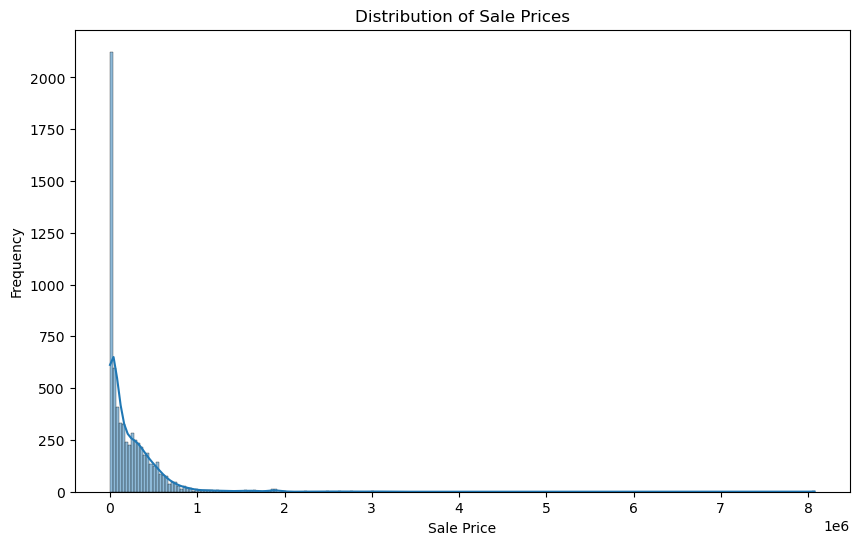

In [410]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['sale_price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


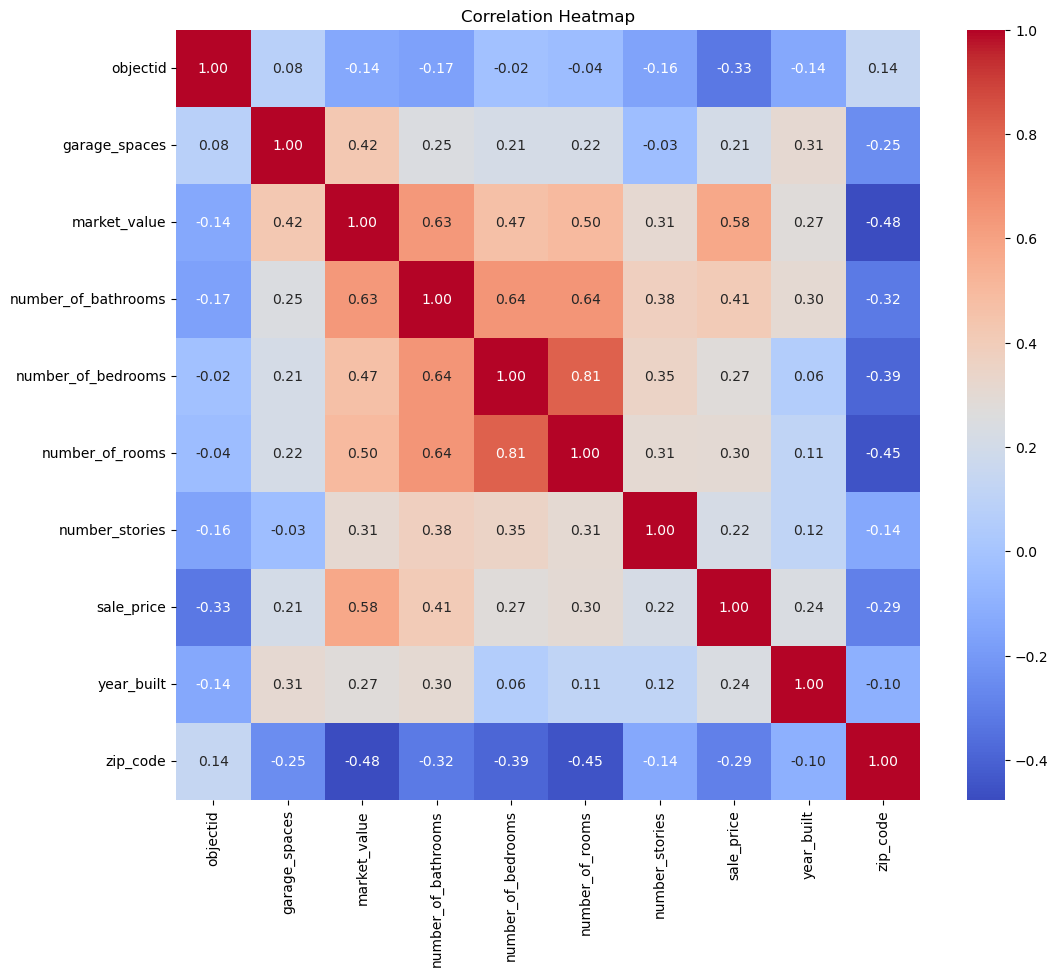

In [411]:
# Remove non-numeric columns for the correlation matrix
data_numeric = data_cleaned.select_dtypes(include=[np.number])

# Now you can plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

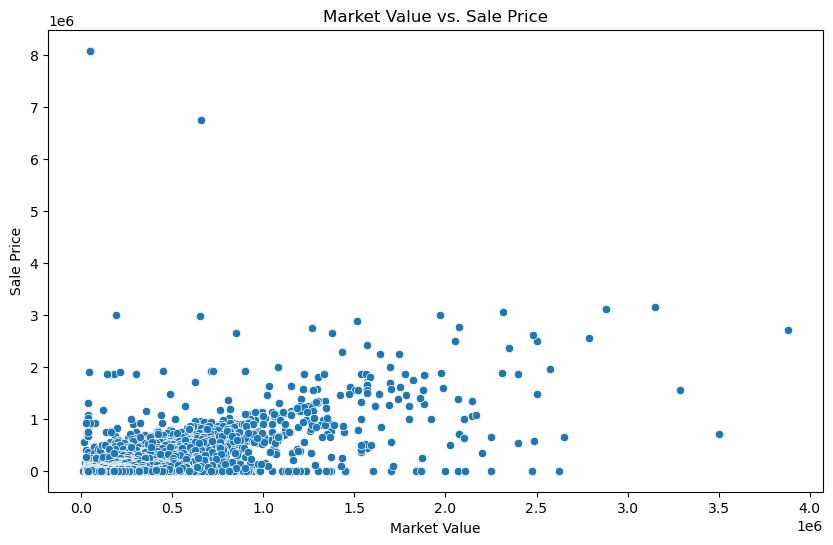

In [412]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['market_value'], y=data_cleaned['sale_price'])
plt.title('Market Value vs. Sale Price')
plt.xlabel('Market Value')
plt.ylabel('Sale Price')
plt.show()


In [417]:
# Sample a smaller fraction of the data, for example, 10% to ensure kernel stability
data_subset = data_cleaned.sample(frac=.10, random_state=42)


In [418]:
# Display the sampled data
print("\nSampled Data (10%):")
data_subset.head()



Sampled Data (10%):


,objectid,assessment_date,basements,beginning_point,building_code_description,category_code_description,garage_spaces,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_price,state_code,street_name,year_built,zip_code
156851,433305317,2022-05-24 12:13:13-04:00,C,371' S DICKINSON ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1552 S TAYLOR ST,107000.0,1.0,3.0,6.0,2.0,100075.0,NJ,TAYLOR,1920.0,19146.0
11395,433154844,2022-05-24 12:13:13-04:00,C,158' S MORRIS ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1722 S MOLE ST,133600.0,1.0,3.0,6.0,2.0,85000.0,PA,MOLE,1920.0,19145.0
287258,433422042,2022-05-24 12:13:13-04:00,C,270' S GREENWAY AVE,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,2137 S SIMPSON ST,52300.0,1.0,3.0,6.0,2.0,25000.0,PA,SIMPSON,1920.0,19142.0
132820,433278824,2022-05-24 12:13:13-04:00,C,"82'11 5/8"" W 3RD ST",ROW 2 STY MASONRY,SINGLE FAMILY,0.0,310 MCKEAN ST,169200.0,1.0,3.0,6.0,2.0,1.0,PA,MC KEAN,1905.0,19148.0
79896,433224413,2022-12-05 09:18:12-05:00,0,"87'10 5/8"" E SEDGWICK",ROW 2 STY FRAME,SINGLE FAMILY,0.0,6937 SPRAGUE ST,273900.0,1.0,3.0,6.0,2.0,254000.0,PA,SPRAGUE,1987.0,19119.0


In [419]:
# List of categorical columns to encode
categorical_cols = ['basements', 'building_code_description', 'category_code_description', 'location', 'state_code', 'street_name']

In [420]:
# Perform one-hot encoding on the subset
data_encoded_subset = pd.get_dummies(data_subset, columns=categorical_cols)

In [421]:
# Display the first few rows of the encoded subset to verify
print("\nEncoded Subset:")
data_encoded_subset.head()


Encoded Subset:


,objectid,assessment_date,beginning_point,garage_spaces,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_price,...,street_name_WINSTON,street_name_WINTON,street_name_WISSAHICKON,street_name_WISTER,street_name_WOODALE,street_name_WOODBROOK,street_name_WOODLAND,street_name_WOODSTOCK,street_name_WOOLSTON,street_name_YOCUM
156851,433305317,2022-05-24 12:13:13-04:00,371' S DICKINSON ST,0.0,107000.0,1.0,3.0,6.0,2.0,100075.0,...,False,False,False,False,False,False,False,False,False,False
11395,433154844,2022-05-24 12:13:13-04:00,158' S MORRIS ST,0.0,133600.0,1.0,3.0,6.0,2.0,85000.0,...,False,False,False,False,False,False,False,False,False,False
287258,433422042,2022-05-24 12:13:13-04:00,270' S GREENWAY AVE,0.0,52300.0,1.0,3.0,6.0,2.0,25000.0,...,False,False,False,False,False,False,False,False,False,False
132820,433278824,2022-05-24 12:13:13-04:00,"82'11 5/8"" W 3RD ST",0.0,169200.0,1.0,3.0,6.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
79896,433224413,2022-12-05 09:18:12-05:00,"87'10 5/8"" E SEDGWICK",0.0,273900.0,1.0,3.0,6.0,2.0,254000.0,...,False,False,False,False,False,False,False,False,False,False


In [422]:
# Calculate Z-scores for numeric columns
numeric_cols = data_subset.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(data_subset[numeric_cols]))


In [423]:
# Set a threshold (commonly 3) to identify and remove outliers
threshold = 3
data_no_outliers = data_subset[(z_scores < threshold).all(axis=1)]

In [424]:
print("\nData after removing outliers:")
data_no_outliers.head()


Data after removing outliers:


,objectid,assessment_date,basements,beginning_point,building_code_description,category_code_description,garage_spaces,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_price,state_code,street_name,year_built,zip_code
156851,433305317,2022-05-24 12:13:13-04:00,C,371' S DICKINSON ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1552 S TAYLOR ST,107000.0,1.0,3.0,6.0,2.0,100075.0,NJ,TAYLOR,1920.0,19146.0
11395,433154844,2022-05-24 12:13:13-04:00,C,158' S MORRIS ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1722 S MOLE ST,133600.0,1.0,3.0,6.0,2.0,85000.0,PA,MOLE,1920.0,19145.0
287258,433422042,2022-05-24 12:13:13-04:00,C,270' S GREENWAY AVE,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,2137 S SIMPSON ST,52300.0,1.0,3.0,6.0,2.0,25000.0,PA,SIMPSON,1920.0,19142.0
132820,433278824,2022-05-24 12:13:13-04:00,C,"82'11 5/8"" W 3RD ST",ROW 2 STY MASONRY,SINGLE FAMILY,0.0,310 MCKEAN ST,169200.0,1.0,3.0,6.0,2.0,1.0,PA,MC KEAN,1905.0,19148.0
79896,433224413,2022-12-05 09:18:12-05:00,0,"87'10 5/8"" E SEDGWICK",ROW 2 STY FRAME,SINGLE FAMILY,0.0,6937 SPRAGUE ST,273900.0,1.0,3.0,6.0,2.0,254000.0,PA,SPRAGUE,1987.0,19119.0


In [455]:
# Create a copy of the DataFrame slice to avoid SettingWithCopyWarning
data_no_outliers = data_subset[(z_scores < threshold).all(axis=1)].copy()

In [460]:
# Drop rows where 'assessment_date' is NaT after conversion
data_no_outliers = data_no_outliers.dropna(subset=['assessment_date'])

In [459]:
# Attempt to convert 'assessment_date' to datetime format and coerce errors to NaT
data_no_outliers['assessment_date'] = pd.to_datetime(data_no_outliers['assessment_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [462]:
# Now, extract the year assuming the conversion was successful
data_no_outliers['assessment_year'] = data_no_outliers['assessment_date'].dt.year

In [463]:
print("\nFinal Preprocessed Data:")
final_data_preprocessed.head()


Final Preprocessed Data:


,objectid,garage_spaces,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_price,year_built,zip_code,house_age
156851,433305317,0.0,107000.0,1.0,3.0,6.0,2.0,100075.0,1920.0,19146.0,102.0
11395,433154844,0.0,133600.0,1.0,3.0,6.0,2.0,85000.0,1920.0,19145.0,102.0
287258,433422042,0.0,52300.0,1.0,3.0,6.0,2.0,25000.0,1920.0,19142.0,102.0
132820,433278824,0.0,169200.0,1.0,3.0,6.0,2.0,1.0,1905.0,19148.0,117.0
79896,433224413,0.0,273900.0,1.0,3.0,6.0,2.0,254000.0,1987.0,19119.0,35.0


In [464]:
# 1. Creating Interaction Terms
data_no_outliers.loc[:, 'bed_bath_interaction'] = data_no_outliers.loc[:, 'number_of_bedrooms'] * data_no_outliers.loc[:, 'number_of_bathrooms']

In [465]:
# 2. Transforming Variables
data_no_outliers.loc[:, 'log_market_value'] = np.log(data_no_outliers.loc[:, 'market_value'] + 1) # Adding 1 to avoid log(0)
data_no_outliers.loc[:, 'log_sale_price'] = np.log(data_no_outliers.loc[:, 'sale_price'] + 1)

In [466]:
# Attempt to convert 'assessment_date' to datetime format and coerce errors to NaT
data_no_outliers['assessment_date'] = pd.to_datetime(data_no_outliers['assessment_date'], errors='coerce')

In [467]:
# Check the data type to ensure it's datetime64[ns]
print(data_no_outliers['assessment_date'].dtype)

datetime64[ns, UTC-04:00]


In [468]:
# Inspect the first few rows to confirm successful conversion
data_no_outliers['assessment_date'].head()

156851   2022-05-24 12:13:13-04:00
11395    2022-05-24 12:13:13-04:00
287258   2022-05-24 12:13:13-04:00
132820   2022-05-24 12:13:13-04:00
12933    2022-05-24 12:13:13-04:00
Name: assessment_date, dtype: datetime64[ns, UTC-04:00]

In [469]:
# This will display the DataFrame in a formatted table
data_no_outliers.head()

,objectid,assessment_date,basements,beginning_point,building_code_description,category_code_description,garage_spaces,location,market_value,number_of_bathrooms,...,number_stories,sale_price,state_code,street_name,year_built,zip_code,assessment_year,bed_bath_interaction,log_market_value,log_sale_price
156851,433305317,2022-05-24 12:13:13-04:00,C,371' S DICKINSON ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1552 S TAYLOR ST,107000.0,1.0,...,2.0,100075.0,NJ,TAYLOR,1920.0,19146.0,2022,3.0,11.580593,11.513685
11395,433154844,2022-05-24 12:13:13-04:00,C,158' S MORRIS ST,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1722 S MOLE ST,133600.0,1.0,...,2.0,85000.0,PA,MOLE,1920.0,19145.0,2022,3.0,11.802613,11.350418
287258,433422042,2022-05-24 12:13:13-04:00,C,270' S GREENWAY AVE,ROW 2 STY MASONRY,SINGLE FAMILY,0.0,2137 S SIMPSON ST,52300.0,1.0,...,2.0,25000.0,PA,SIMPSON,1920.0,19142.0,2022,3.0,10.864771,10.126671
132820,433278824,2022-05-24 12:13:13-04:00,C,"82'11 5/8"" W 3RD ST",ROW 2 STY MASONRY,SINGLE FAMILY,0.0,310 MCKEAN ST,169200.0,1.0,...,2.0,1.0,PA,MC KEAN,1905.0,19148.0,2022,3.0,12.038843,0.693147
12933,433156548,2022-05-24 12:13:13-04:00,A,"140'4 3/4"" W OF 13 ST",ROW 2 STY MASONRY,SINGLE FAMILY,0.0,1319 SNYDER AVE,198000.0,2.0,...,2.0,400000.0,PA,SNYDER,1925.0,19148.0,2022,6.0,12.196027,12.899222


In [470]:
# After ensuring all features are numeric and no NaN values are present
# Prepare your final dataset for modeling
final_data_preprocessed = final_data_preprocessed.select_dtypes(include=[np.number])
final_data_preprocessed = final_data_preprocessed.dropna()


In [471]:
X = final_data_preprocessed.drop('sale_price', axis=1)  # Features
y = final_data_preprocessed['sale_price']  # Target variable


In [472]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [473]:
# Before training the model, ensure there are no non-numeric values in X_train
if not all([np.issubdtype(dt, np.number) for dt in X_train.dtypes]):
    raise ValueError("X_train contains non-numeric values. Please ensure all columns are numeric.")


In [474]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [475]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [476]:
# Assessing RMSE Relative to House Prices
average_price = y_test.mean()
price_range = y_test.max() - y_test.min()
print(f"RMSE: {rmse}")
print(f"Average House Price: {average_price}")
print(f"Price Range: {price_range}")


RMSE: 153686.81100246048
Average House Price: 222996.90476190476
Price Range: 1224203.0


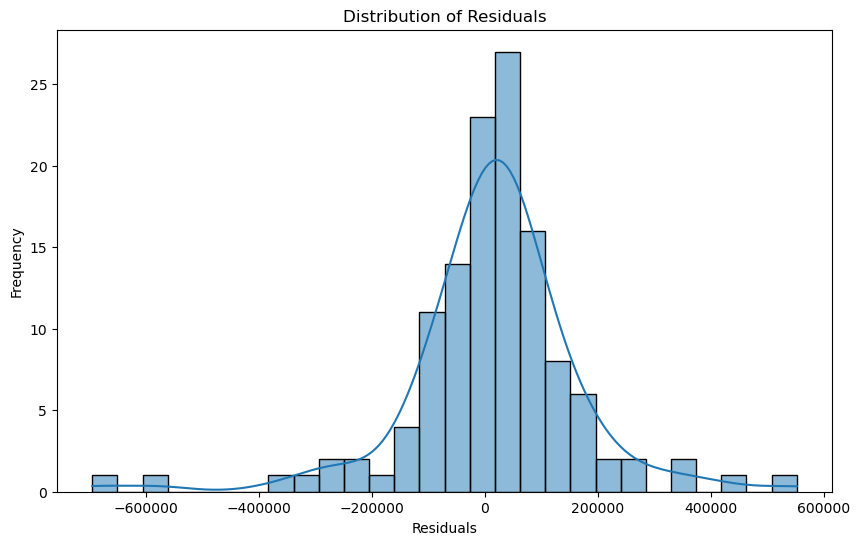

In [477]:
# Check for normal distribution of errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

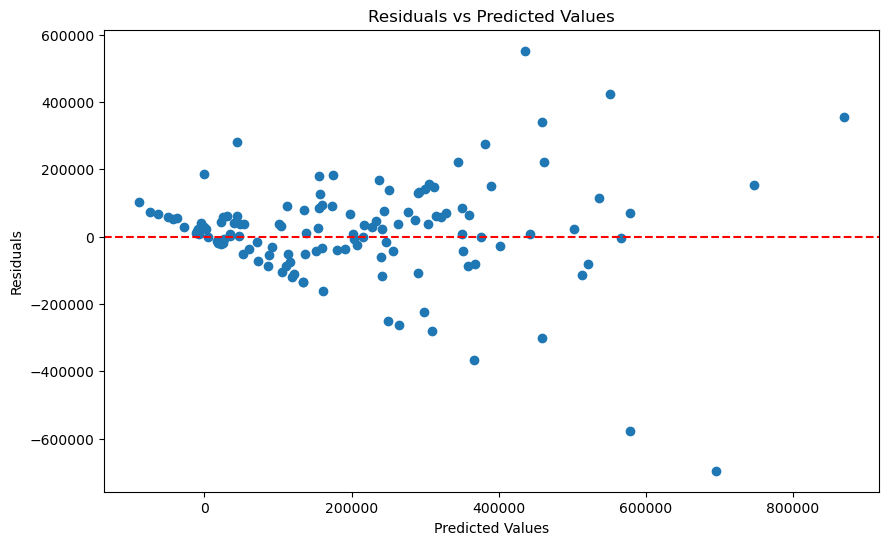

In [478]:
# Scatter plot to check for homoscedasticity (constant variance)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [479]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

In [480]:
# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [481]:
# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


In [482]:
# Perform the grid search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [483]:
# Find the best model
best_rf_model = grid_search.best_estimator_


In [484]:
# Predict on the testing set
y_pred_rf = best_rf_model.predict(X_test)

In [485]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

In [486]:
print(f"RMSE for Random Forest: {rmse_rf}")

RMSE for Random Forest: 144879.8046595425
